In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('global_power_plant_database.csv')

##details about data set

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

In [7]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,29910.000000,29910.000000,29910.000000,16303.000000,13743.000000,6996.000000,7440.000000,8144.000000,8971.000000,9213.000000,21791.000000
mean,186.294810,32.497558,-12.458680,1995.486227,2016.860001,689.625437,664.840134,664.270784,583.622877,579.524723,847.036474
std,525.703572,23.654472,76.978265,23.525537,1.195205,2330.869715,2258.351290,2304.225386,2097.603620,2063.070235,4067.434967
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.000000
25%,4.774430,28.863475,-79.211275,1986.000000,2017.000000,2.167000,2.157000,2.350250,2.380500,3.202000,10.082961
50%,18.900000,40.071250,-3.746700,2005.000000,2017.000000,27.033000,23.005000,22.094000,17.862000,20.462000,53.417041
75%,100.000000,47.134575,24.931050,2012.063866,2017.000000,250.600500,224.955250,238.437917,187.084835,192.567000,339.874490
max,22500.000000,71.292000,179.388700,2018.000000,2018.000000,50834.000000,32320.917000,59546.865000,32377.477000,35116.000000,450562.692350


#KPIs


####1. Total installed capacity globally




In [8]:

total_capacity = df['capacity_mw'].sum()
print(f"Total Installed Capacity (MW): {total_capacity}")


Total Installed Capacity (MW): 5572077.7622569995


#### 2.Distribution of energy sources (fuel types) **globally**

In [9]:

energy_mix = df['primary_fuel'].value_counts(normalize=True) * 100
print("Energy Mix by Fuel Type (%):")
print(energy_mix)


Energy Mix by Fuel Type (%):
primary_fuel
Hydro             23.921765
Solar             19.822802
Wind              17.345369
Gas               13.112671
Coal               7.990639
Oil                7.656302
Biomass            4.667335
Waste              3.634236
Nuclear            0.661986
Geothermal         0.631896
Storage            0.193915
Other              0.147108
Cogeneration       0.137078
Petcoke            0.043464
Wave and Tidal     0.033434
Name: proportion, dtype: float64


#### 3.Defining renewable and non-renewable fuel types and  Ratio of renewable to non-renewable capacity

In [10]:

renewable_fuels = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
renewable_capacity = df[df['primary_fuel'].isin(renewable_fuels)]['capacity_mw'].sum()
non_renewable_capacity = df[~df['primary_fuel'].isin(renewable_fuels)]['capacity_mw'].sum()


renewable_ratio = (renewable_capacity / total_capacity) * 100
non_renewable_ratio = (non_renewable_capacity / total_capacity) * 100
print(f"Renewable Energy Capacity Ratio (%): {renewable_ratio}")
print(f"Non-renewable Energy Capacity Ratio (%): {non_renewable_ratio}")


Renewable Energy Capacity Ratio (%): 25.14879788437108
Non-renewable Energy Capacity Ratio (%): 74.85120211562892


#### 4.Grouping by country and summing the capacities

In [11]:

geographic_distribution = df.groupby('country_long')['capacity_mw'].sum().reset_index()
geographic_distribution = geographic_distribution.sort_values(by='capacity_mw', ascending=False)
print("Geographical Distribution of Power Plants (by Capacity):")
print(geographic_distribution.head())


Geographical Distribution of Power Plants (by Capacity):
                 country_long  capacity_mw
30                      China  1363282.780
155  United States of America  1193616.450
67                      India   288694.111
124                    Russia   227555.550
75                      Japan   211667.750


###5. Count of power plants by fuel type

In [12]:

plant_count_by_fuel = df['primary_fuel'].value_counts()
print("Number of Power Plants by Fuel Type:")
print(plant_count_by_fuel)


Number of Power Plants by Fuel Type:
primary_fuel
Hydro             7155
Solar             5929
Wind              5188
Gas               3922
Coal              2390
Oil               2290
Biomass           1396
Waste             1087
Nuclear            198
Geothermal         189
Storage             58
Other               44
Cogeneration        41
Petcoke             13
Wave and Tidal      10
Name: count, dtype: int64


#1. Data Cleaning and Preprocessing
The goal of this step is to remove or handle missing, irrelevant, or inconsistent data. We’ll handle the missing values, format inconsistencies, and remove any unnecessary columns.

In [39]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Dropping columns that are mostly missing or irrelevant
# Let's assume 'url' and 'other_info' columns are irrelevant for analysis (example: replace with real column names)
data_cleaned = df.drop(['url', 'other_info','other_fuel1','other_fuel2'], axis=1, errors='ignore')

# Handling missing values in important columns like 'capacity_mw', 'primary_fuel', and 'country'
# For numerical columns, we'll fill missing values with the mean or median
data_cleaned['capacity_mw']= data_cleaned['capacity_mw'].fillna(data_cleaned['capacity_mw'].median())

# For categorical columns, we'll fill with the mode or 'Unknown'
data_cleaned['primary_fuel']= data_cleaned['primary_fuel'].fillna(data_cleaned['primary_fuel'].mode()[0])
data_cleaned['country_long']= data_cleaned['country_long'].fillna(data_cleaned['country_long'].mode()[0])
data_cleaned['commin\ssioning_year']= data_cleaned['commissioning_year'].fillna(data_cleaned['commissioning_year'].mode()[0])
# Verify if the dataset has any remaining missing values
print("Missing values after cleaning:\n", data_cleaned.isnull().sum())

Missing values in each column:
 country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 27947
other_fuel2                 29607
other_fuel3                 29806
commissioning_year          13607
owner                       10379
source                         15
url                            18
geolocation_source            419
wepp_id                     13529
year_of_capacity_data       16167
generation_gwh_2013         22914
generation_gwh_2014         22470
generation_gwh_2015         21766
generation_gwh_2016         20939
generation_gwh_2017         20697
estimated_generation_gwh     8119
dtype: int64
Missing values after cleaning:
 country                         0
country_long                    0
name                            0
gppd_

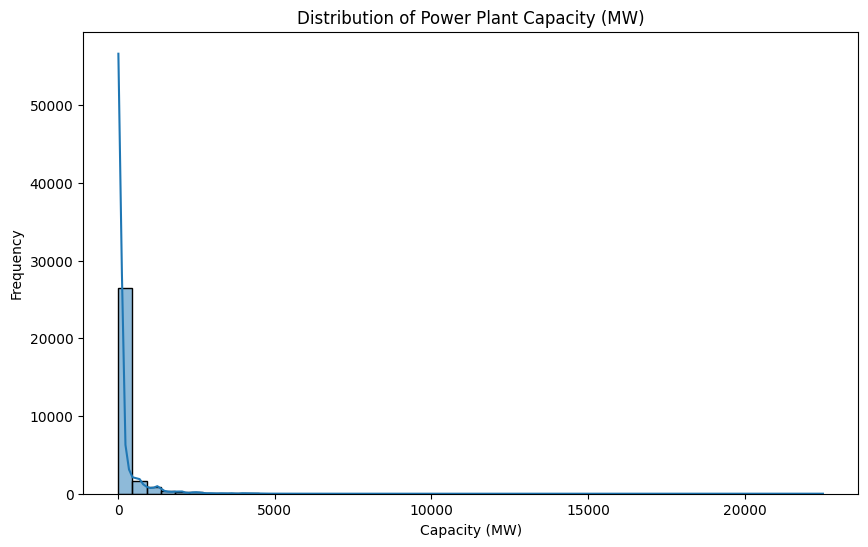

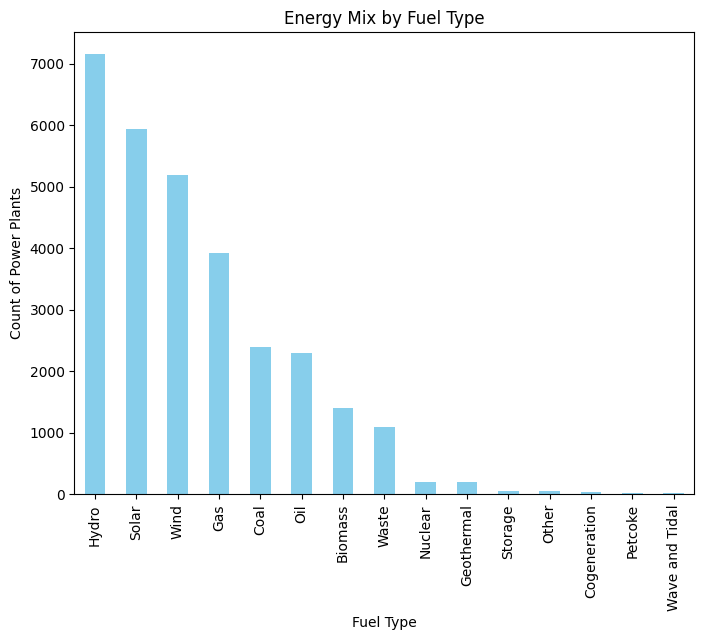

<ipython-input-40-83cf5ef648b9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

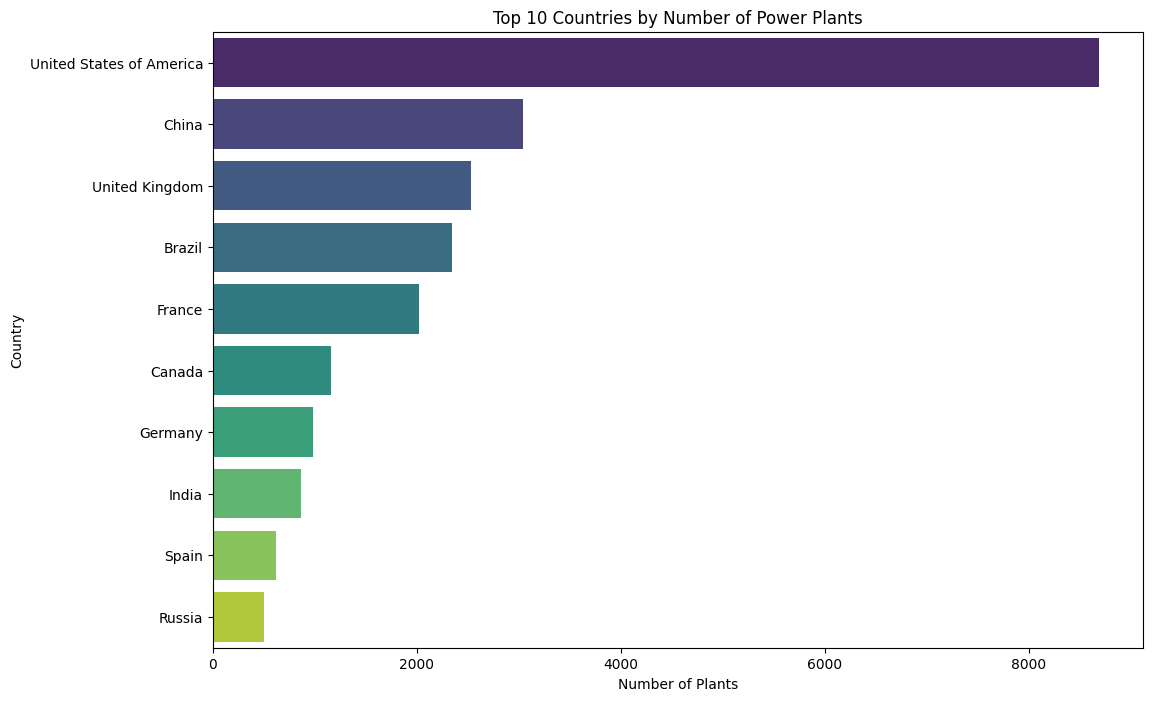

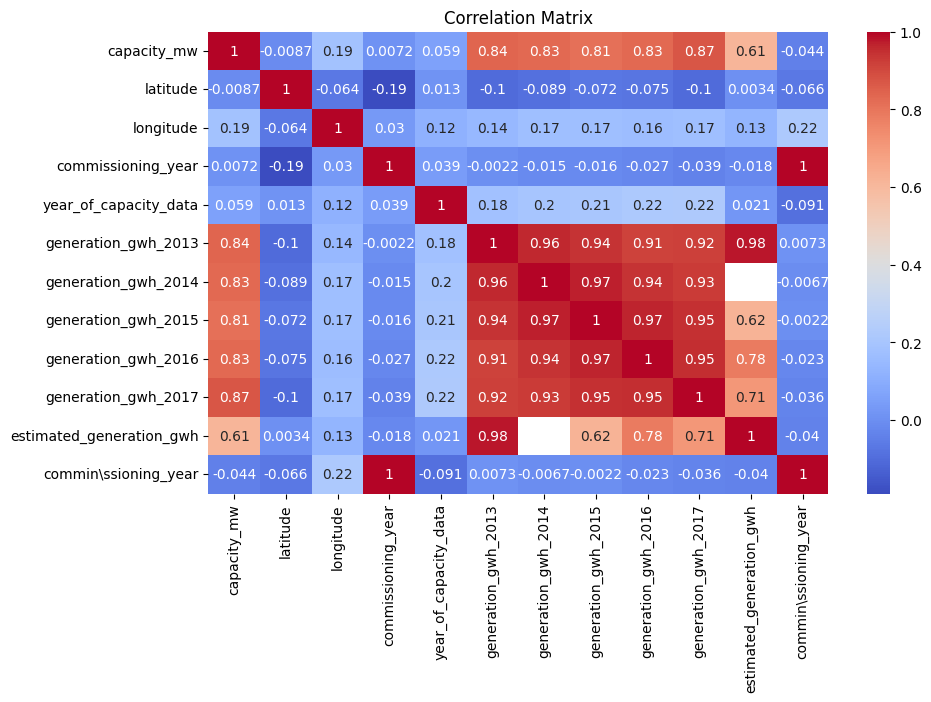

In [40]:

# Distribution of power plant capacity
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['capacity_mw'], bins=50, kde=True)
plt.title("Distribution of Power Plant Capacity (MW)")
plt.xlabel("Capacity (MW)")
plt.ylabel("Frequency")
plt.show()

# Energy mix by fuel type
plt.figure(figsize=(8,6))
fuel_mix_plot = data_cleaned['primary_fuel'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Energy Mix by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count of Power Plants")
plt.show()

# Geographical distribution of plants by country
plt.figure(figsize=(12,8))
top_countries = data_cleaned['country_long'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Power Plants")
plt.xlabel("Number of Plants")
plt.ylabel("Country")
plt.show()

# Correlation matrix to see relationships between numerical variables
# Select only numerical columns for correlation calculation
numerical_data = data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#Model


In [47]:
##preparing data for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Creating feature matrix X and target variable y (hypothetical: predicting capacity_mw)
X = data_cleaned[['primary_fuel', 'commissioning_year', 'latitude', 'longitude']]
y = data_cleaned['capacity_mw']

# Encoding categorical variables
le = LabelEncoder()
X['primary_fuel'] = le.fit_transform(X['primary_fuel'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import necessary machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and fit a RandomForest model (for regression)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

<ipython-input-47-9291081082b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['primary_fuel'] = le.fit_transform(X['primary_fuel'])


Mean Absolute Error: 143.06203784112327
Mean Squared Error: 176694.7289794146
R^2 Score: 0.3750955355074591


In [48]:

##b. Simulating Renewable Energy Adoption:
# Simulating renewable adoption by increasing renewable capacity (e.g., increasing capacity of wind/solar by 50%)
renewable_fuels = ['Wind', 'Solar', 'Hydro', 'Geothermal']
renewable_simulation = data_cleaned.copy()
renewable_simulation.loc[renewable_simulation['primary_fuel'].isin(renewable_fuels), 'capacity_mw'] *= 1.5

# Re-run the model on the new data
X_simulation = renewable_simulation[['primary_fuel', 'commissioning_year', 'latitude', 'longitude']]
X_simulation['primary_fuel'] = le.transform(X_simulation['primary_fuel'])
y_simulation = renewable_simulation['capacity_mw']

# Predictions for simulated data
y_sim_pred = model.predict(X_simulation)
print("Simulated Energy Capacity Predictions:")
print(y_sim_pred)

<ipython-input-48-227da1b70d48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_simulation['primary_fuel'] = le.transform(X_simulation['primary_fuel'])


Simulated Energy Capacity Predictions:
[100.728    79.754    81.2945  ... 157.74835 706.06455 703.2015 ]


#Visualisation

<ipython-input-49-8eadfcf343e7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

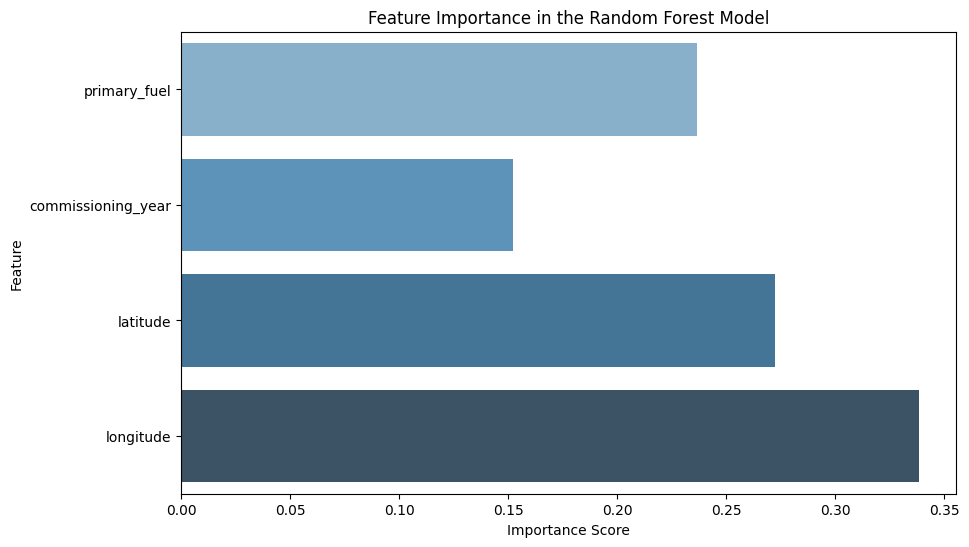

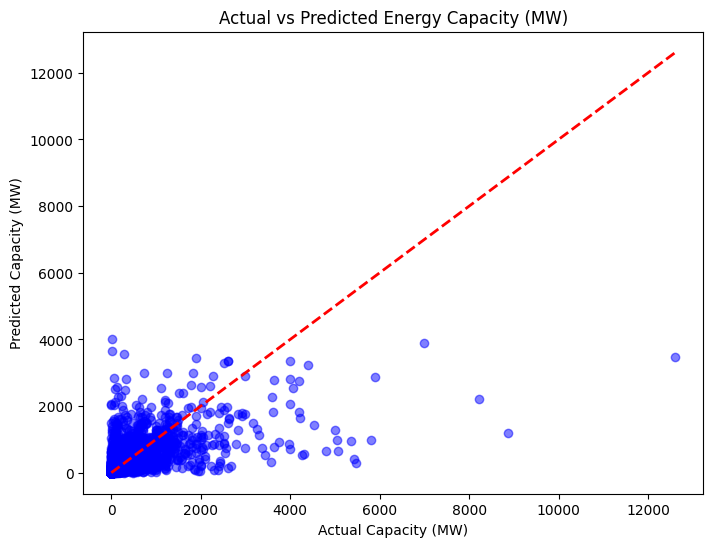

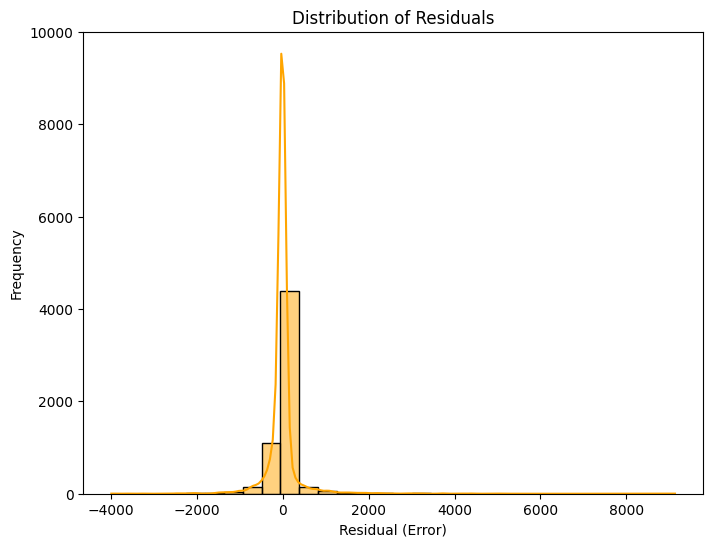

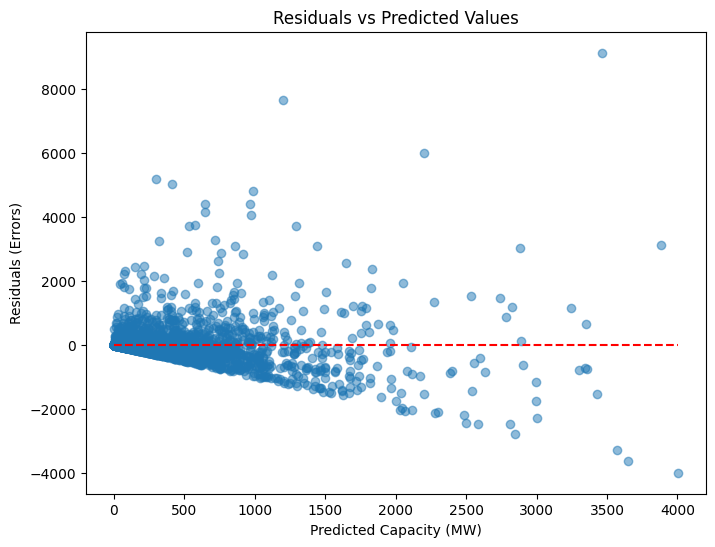

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Feature Importance Plot
# Extracting feature importances from the model
feature_importances = model.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='Blues_d')
plt.title('Feature Importance in the Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# 2. Actual vs Predicted Plot
# Plotting actual vs predicted energy capacity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Energy Capacity (MW)')
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.show()

# 3. Residual Plot
# Residuals (errors) are the differences between actual and predicted values
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Error)')
plt.ylabel('Frequency')
plt.show()

# 4. Residuals vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Capacity (MW)')
plt.ylabel('Residuals (Errors)')
plt.show()


1. What is the distribution of power plant capacities across the dataset?



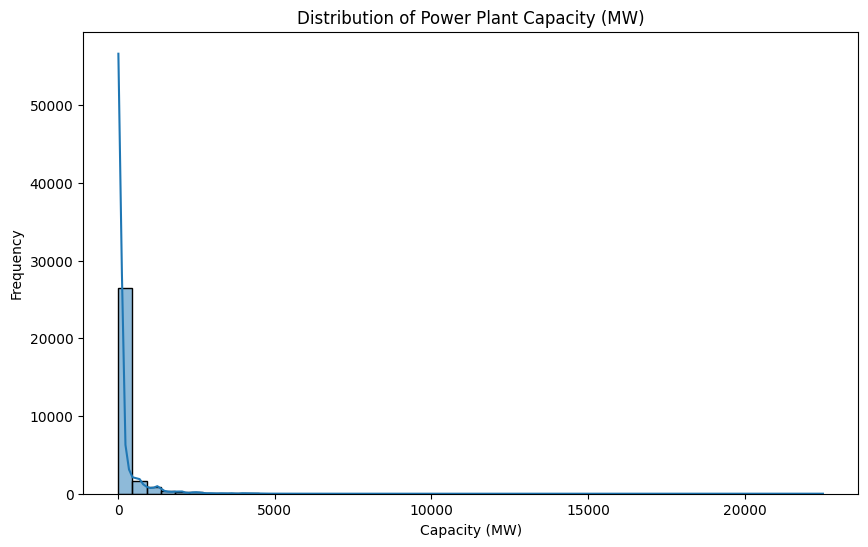

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['capacity_mw'], bins=50, kde=True)
plt.title("Distribution of Power Plant Capacity (MW)")
plt.xlabel("Capacity (MW)")
plt.ylabel("Frequency")
plt.show()


Question 2: Which countries have the highest number of power plants?

<ipython-input-51-870ce28a8ca3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

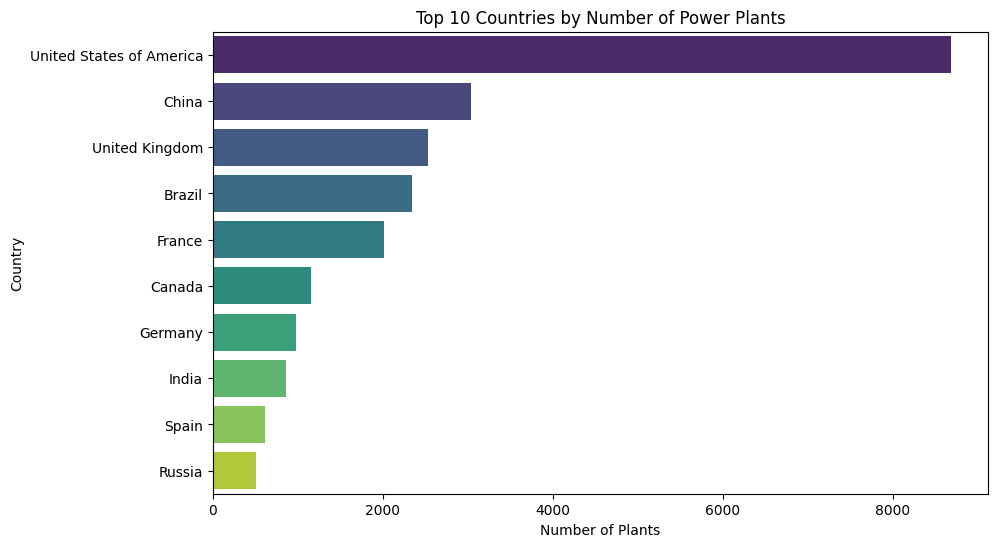

In [51]:
plt.figure(figsize=(10,6))
top_countries = data_cleaned['country_long'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Power Plants")
plt.xlabel("Number of Plants")
plt.ylabel("Country")
plt.show()


What is the energy mix by fuel type across the dataset?

<ipython-input-52-f13614d2357b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_cleaned['primary_fuel'], palette='coolwarm', order=data_cleaned['primary_fuel'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabo

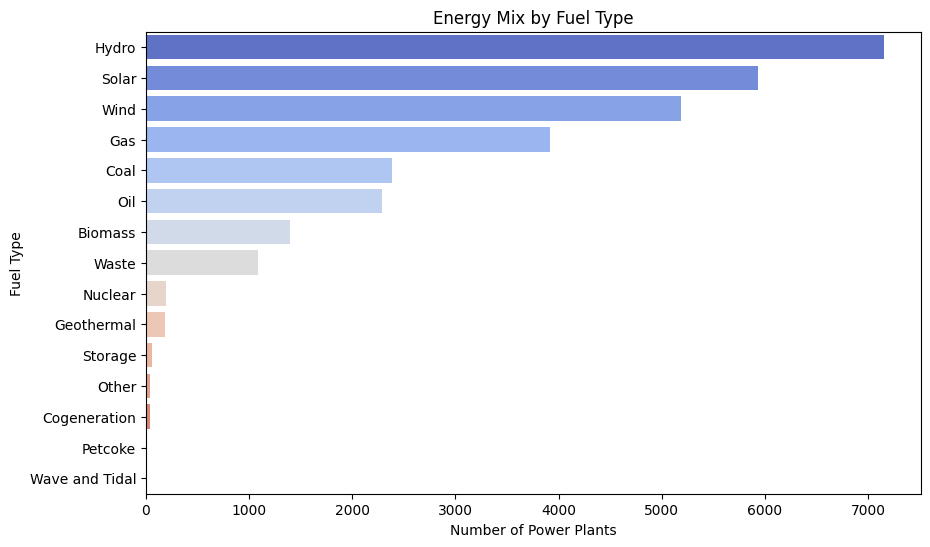

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(y=data_cleaned['primary_fuel'], palette='coolwarm', order=data_cleaned['primary_fuel'].value_counts().index)
plt.title("Energy Mix by Fuel Type")
plt.xlabel("Number of Power Plants")
plt.ylabel("Fuel Type")
plt.show()


4.How are power plants distributed geographically based on latitude and longitude?

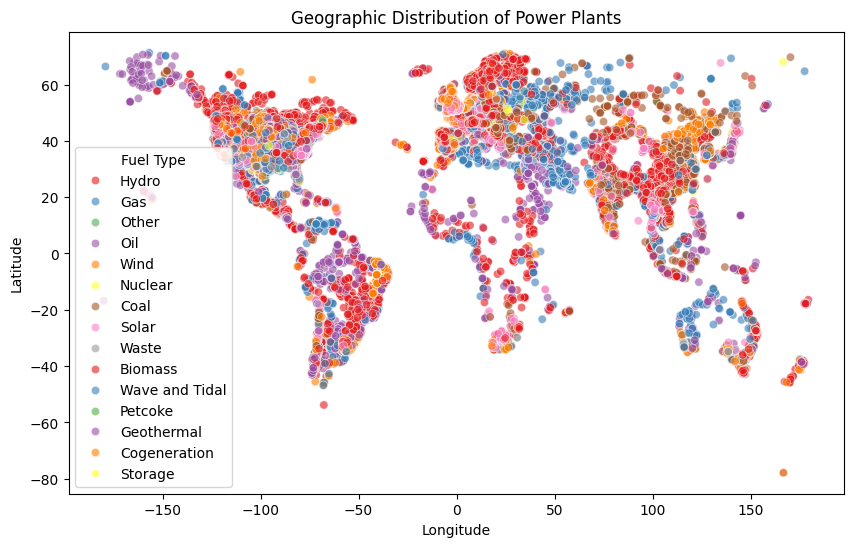

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_cleaned['longitude'], y=data_cleaned['latitude'], hue=data_cleaned['primary_fuel'], palette='Set1', alpha=0.6)
plt.title("Geographic Distribution of Power Plants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Fuel Type")
plt.show()


Question 5: What is the correlation between power plant capacity and its commissioning year?


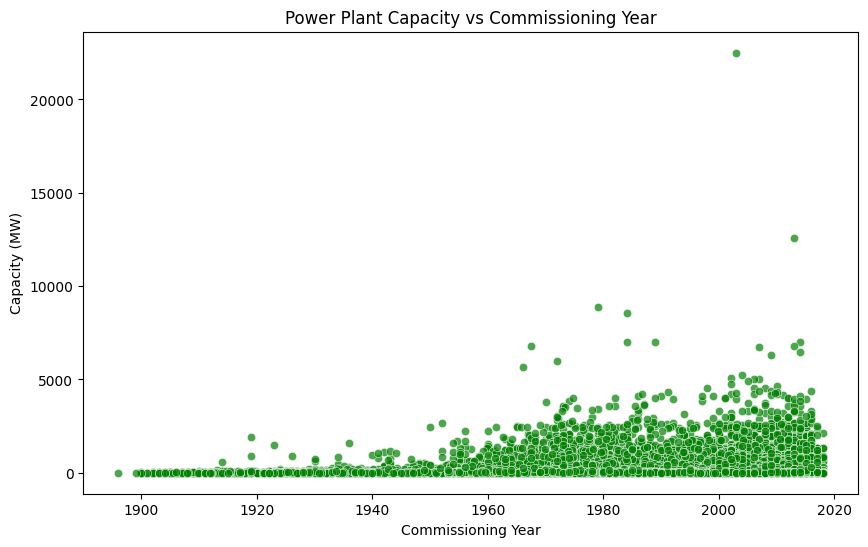

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_cleaned['commissioning_year'], y=data_cleaned['capacity_mw'], alpha=0.7, color='green')
plt.title("Power Plant Capacity vs Commissioning Year")
plt.xlabel("Commissioning Year")
plt.ylabel("Capacity (MW)")
plt.show()


 6.How does the energy mix change over time (commissioning year)?

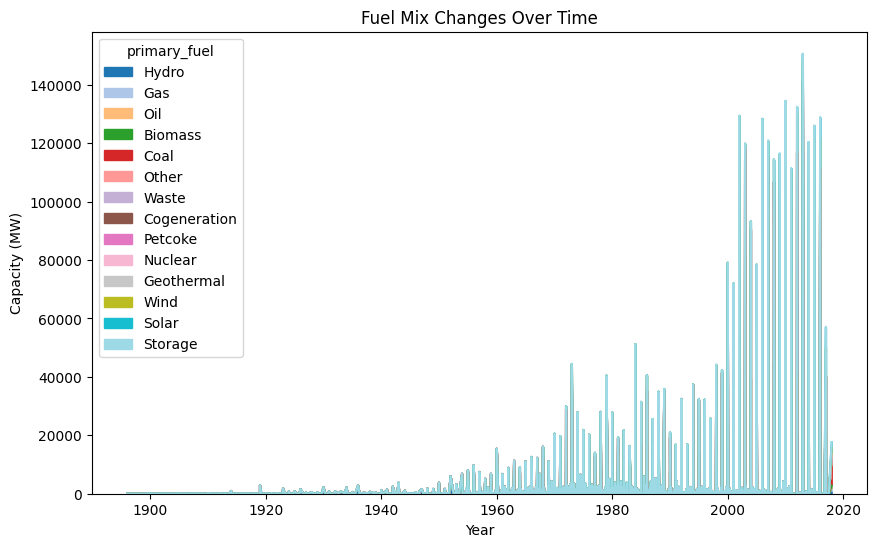

In [55]:
if 'commissioning_year' in data_cleaned.columns:
    fuel_mix_over_time = data_cleaned.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)
    fuel_mix_over_time.plot(kind='area', figsize=(10,6), stacked=True, colormap='tab20')
    plt.title("Fuel Mix Changes Over Time")
    plt.xlabel("Year")
    plt.ylabel("Capacity (MW)")
    plt.show()


Question 7: What is the feature importance in the machine learning model for predicting energy capacity?


<ipython-input-56-32d999a17eed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

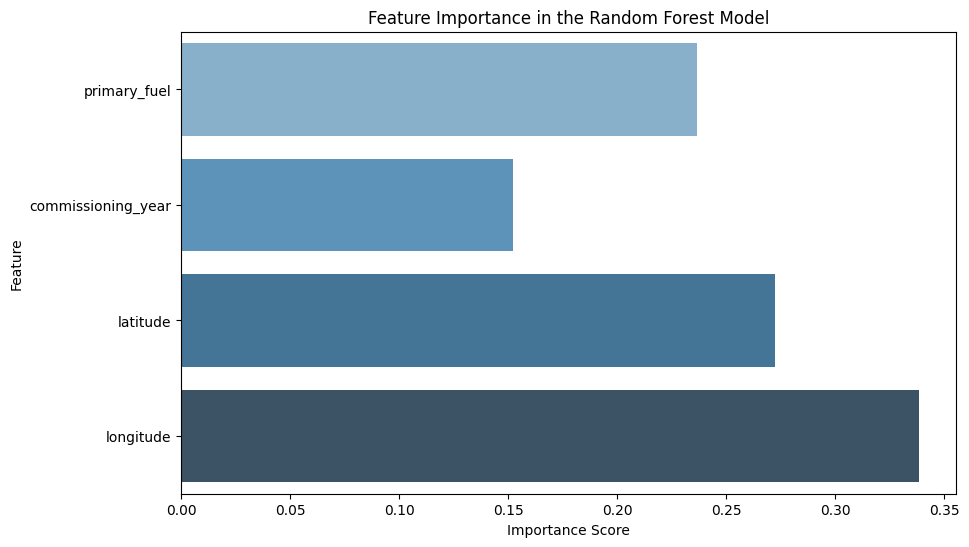

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features, palette='Blues_d')
plt.title("Feature Importance in the Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


 Question 8: What is the relationship between actual and predicted energy capacities in the machine learning model?

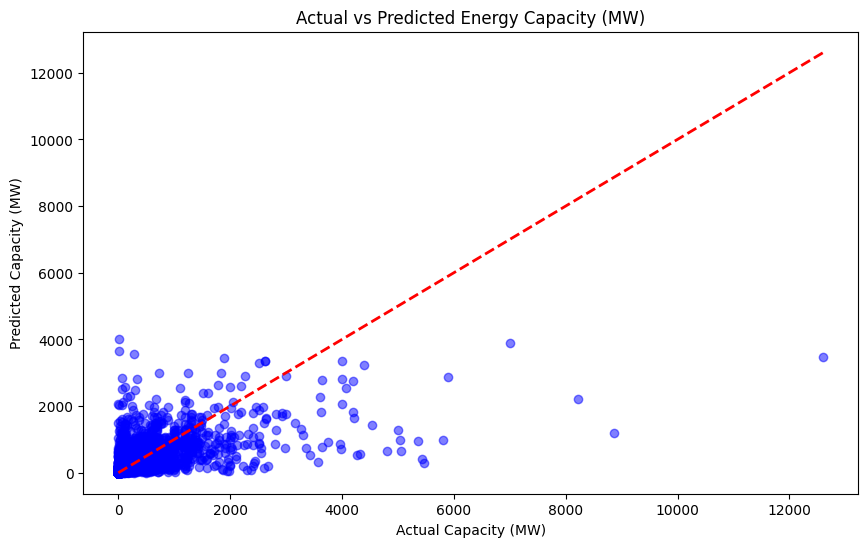

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Energy Capacity (MW)')
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.show()


Question 9: What is the distribution of residuals (errors) in the machine learning model?

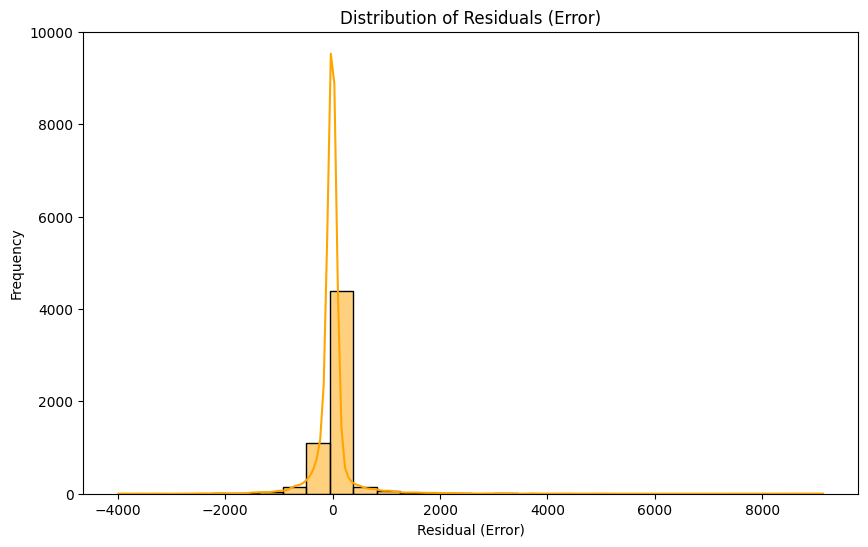

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals (Error)')
plt.xlabel('Residual (Error)')
plt.ylabel('Frequency')
plt.show()


Question 10: How do residuals vary with predicted energy capacity?

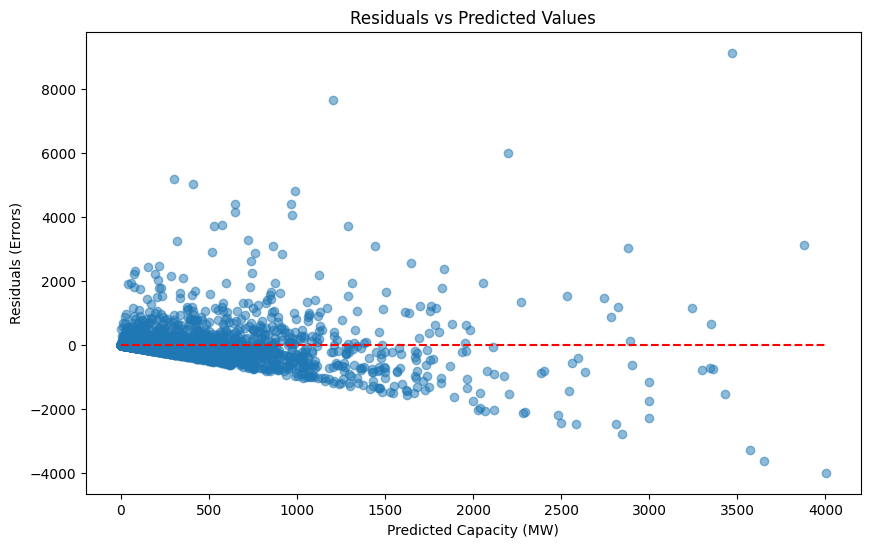

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Capacity (MW)')
plt.ylabel('Residuals (Errors)')
plt.show()
